# nnAudio

Audio processing by using pytorch 1D convolution network. By doing so, spectrograms can be generated from audio on-the-fly during neural network training. Kapre and torch-stft have a similar concept in which they also use 1D convolution from keras adn PyTorch to do the waveforms to spectrogram conversions.

Other GPU audio processing tools are torchaudio and tf.signal. But they are not using the neural network approach, and hence the Fourier basis can not be trained.

The name of nnAudio comes from torch.nn, since most of the codes are built from torch.nn.

In [21]:
!pip install nnAudio

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [22]:
from nnAudio import Spectrogram
from scipy.io import wavfile
import torch
import matplotlib.pyplot as plt

In [23]:
if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    device = "cpu"

In [24]:
!wget "https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav"
sr, song = wavfile.read('file_example_WAV_1MG.wav') # Loading your audio
x = song.mean(1) # Converting Stereo  to Mono
x = torch.tensor(x, device=device).float() # casting the array into a PyTorch Tensor

--2020-09-09 20:23:33--  https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav
Resolving file-examples-com.github.io (file-examples-com.github.io)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to file-examples-com.github.io (file-examples-com.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073218 (1.0M) [audio/wav]
Saving to: ‘file_example_WAV_1MG.wav.2’

file_example_WAV_1M 100%[===================>]   1.02M  --.-KB/s    in 0.08s   

2020-09-09 20:23:33 (12.4 MB/s) - ‘file_example_WAV_1MG.wav.2’ saved [1073218/1073218]



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


**Currently there are 3 models to generate various types of spectrograms**

# 1. STFT

In [25]:
# linear spectrograms
spec_layer = Spectrogram.STFT(n_fft=2048, freq_bins=None, hop_length=512, 
                              window='hann', freq_scale='log', center=True, pad_mode='reflect', 
                              fmin=50,fmax=11025, sr=sr, device=device) # Initializing the model with device='cuda:0'
spec_lin = spec_layer(x)

sampling rate = 8000. Please make sure the sampling rate is correct in order to get a valid freq range
STFT kernels created, time used = 0.1417 seconds


In [26]:
# log spectrograms
spec_layer = Spectrogram.STFT(n_fft=2048, freq_bins=None, hop_length=512, 
                              window='hann', freq_scale='linear', center=True, pad_mode='reflect', 
                              fmin=50,fmax=11025, sr=sr, device=device) # Initializing the model with device='cuda:0'
spec_log = spec_layer(x)

sampling rate = 8000. Please make sure the sampling rate is correct in order to get a valid freq range
STFT kernels created, time used = 0.1199 seconds


# 2. Mel Spectrogram

In [27]:
# Mel spectrogram
spec_layer = Spectrogram.MelSpectrogram(sr=22050, n_fft=2048, n_mels=128, 
                                        hop_length=512, window='hann', center=True, 
                                        pad_mode='reflect', htk=False, fmin=0.0, fmax=None, 
                                        norm=1, trainable_mel=False, trainable_STFT=False, device=device)  # Initializing the model with device='cuda:0'
spec_mel = spec_layer(x)

STFT filter created, time used = 0.0033 seconds
Mel filter created, time used = 0.0039 seconds


# 3. CQT

In [28]:
# CQT
spec_layer = Spectrogram.CQT2010v2(sr=22050, hop_length=512, fmin=55, fmax=None, n_bins=88,
                                   bins_per_octave=12, norm=True, basis_norm=1, 
                                   window='hann', pad_mode='reflect', earlydownsample=True, device=device)  # Initializing the model with device='cuda:0'

spec_cqt = spec_layer(x)

Low pass filter created, time used = 0.0021 seconds
num_octave =  8
No early downsampling is required, downsample_factor =  1
Early downsampling filter created, time used = 0.0002 seconds
CQT kernels created, time used = 0.0083 seconds


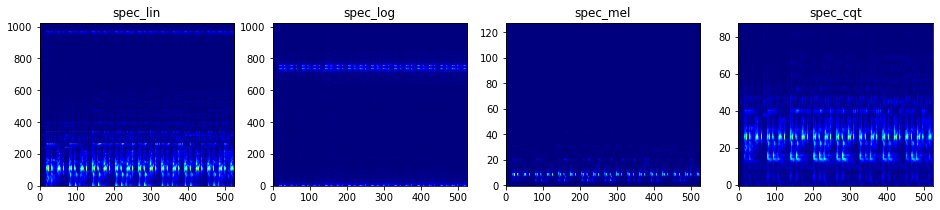

In [29]:
fig, ax = plt.subplots(1,4, figsize=(16,3))
labels = ['spec_lin', 'spec_log', 'spec_mel', 'spec_cqt']
for i,spec in enumerate([spec_lin, spec_log, spec_mel, spec_cqt]):
  ax[i].imshow(spec.cpu().numpy()[0], origin='lower', cmap='jet', aspect='auto')
  ax[i].title.set_text(labels[i])

Source: https://github.com/KinWaiCheuk/nnAudio